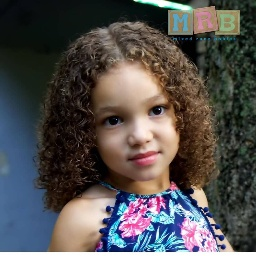

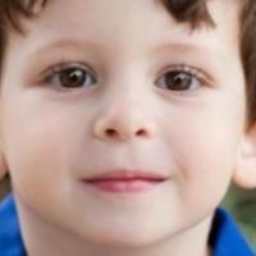

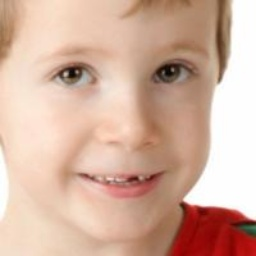

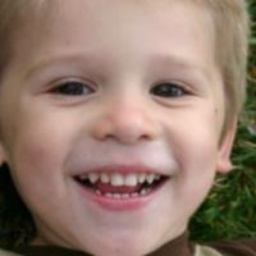

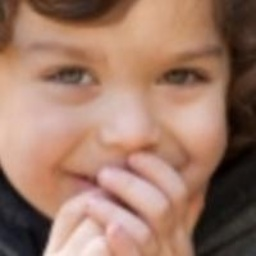

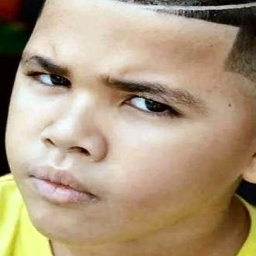

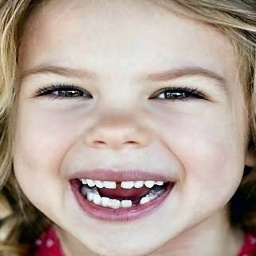

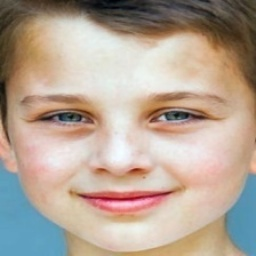

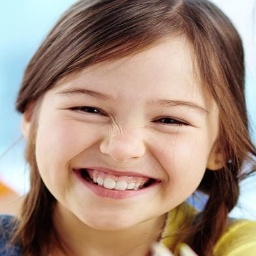

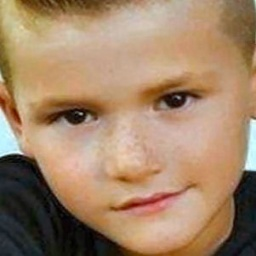

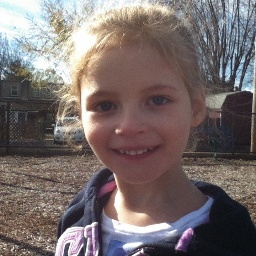

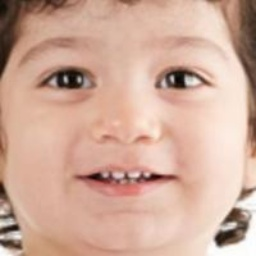

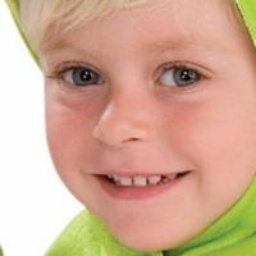

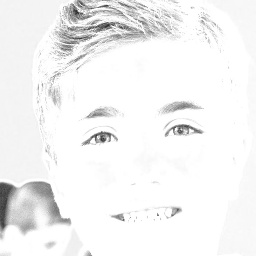

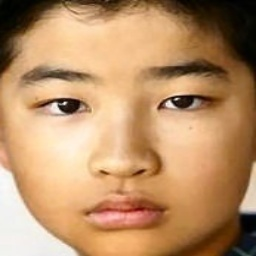

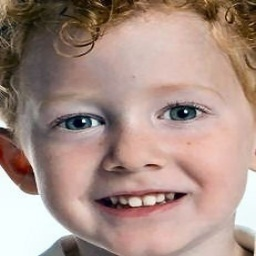

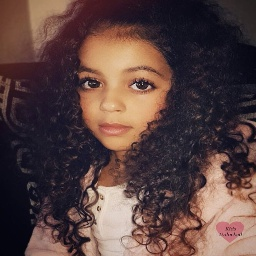

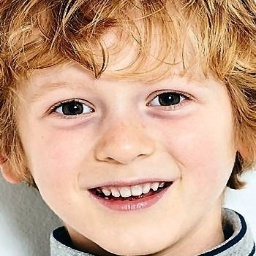

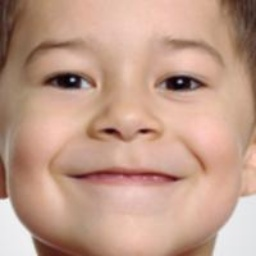

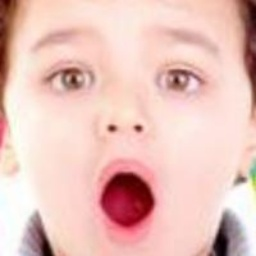

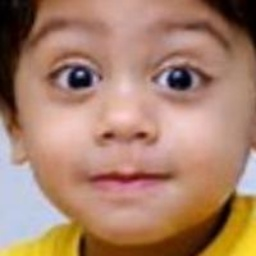

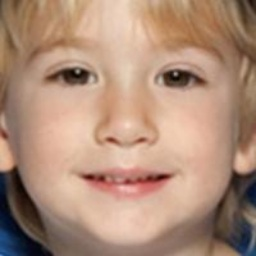

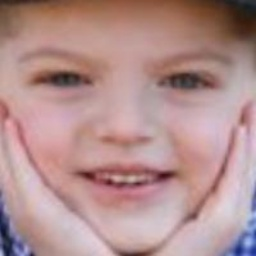

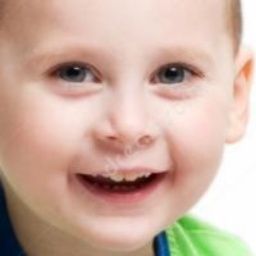

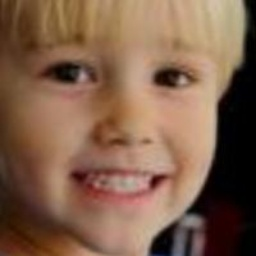

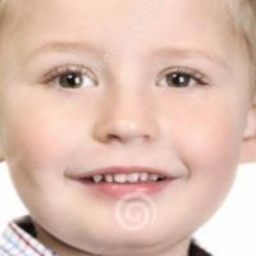

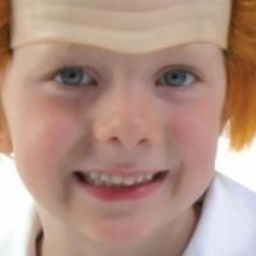

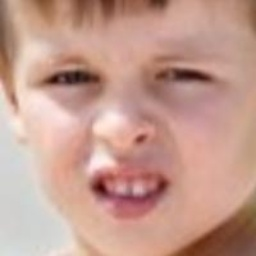

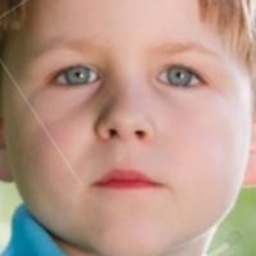

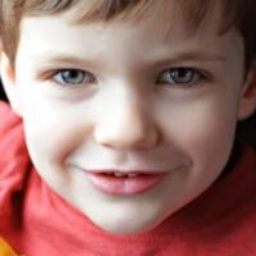

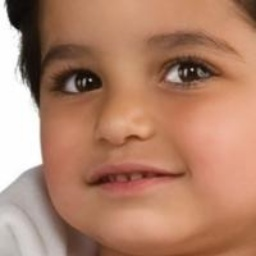

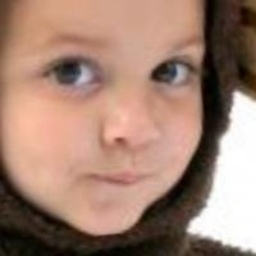

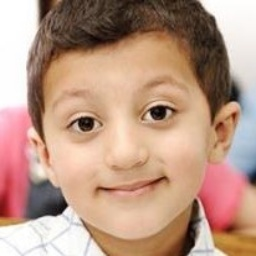

In [2]:
### resize all images in same size 11111

import cv2
import os
import dlib
from IPython.display import Image, display

# Set the path to the directory containing your images
input_directory = '/Users/isurudissanayake/Documents/Data/Test'

# Set the output directory for resized images
output_directory = '/Users/isurudissanayake/Documents/Data/Resize'

# Set the target size (width, height) for resizing
target_size = (256, 256)

# Iterate through each file in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):  # Assuming images are in JPEG or PNG format
        # Read the image
        image_path = os.path.join(input_directory, filename)
        img = cv2.imread(image_path)

        # Resize the image
        resized_img = cv2.resize(img, target_size)

        # Save the resized image to the output directory
        output_path = os.path.join(output_directory, filename)
        cv2.imwrite(output_path, resized_img)
        display(Image(filename=output_path, width=20, height=20))


laplacian_var:  802.6175128698579


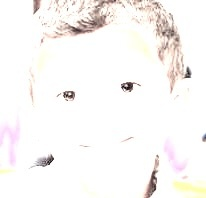

Processed and saved: /Users/isurudissanayake/Documents/Data/Processed/_____________ 2.jpg
laplacian_var:  133.37055723308117


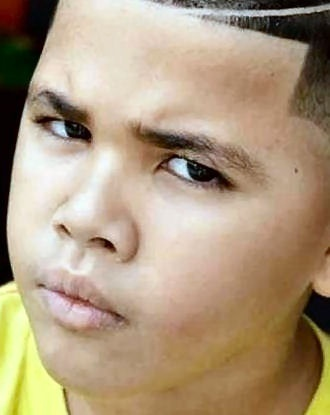

Processed and saved: /Users/isurudissanayake/Documents/Data/Processed/01.jpg
laplacian_var:  243.56282153350375


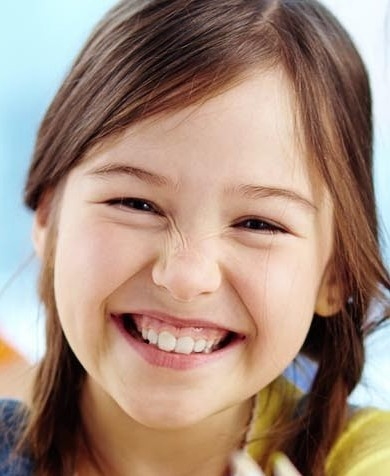

Processed and saved: /Users/isurudissanayake/Documents/Data/Processed/+â+ä-+à+º-+è+«+¦-+º+ä+¬+é+»+è+à-+ä+à+»+º+¦+¦-+¦+è+º+¦-+º+ä+º+++ü+º+ä-2018-+ü+è-+à+¦+¦.jpg
laplacian_var:  654.919164982171


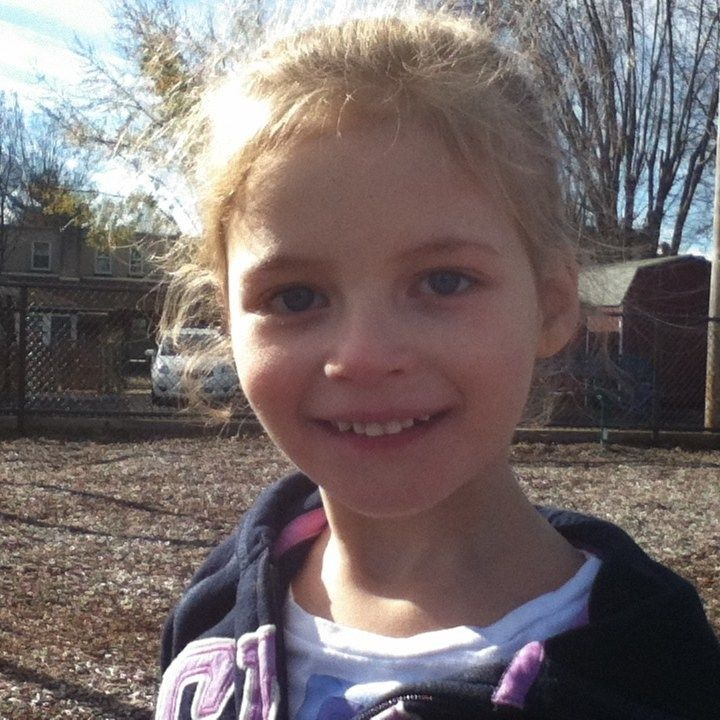

Processed and saved: /Users/isurudissanayake/Documents/Data/Processed/1d630fc582c0ef40b9b2275b7539cda5.jpg
laplacian_var:  143.46065918317336


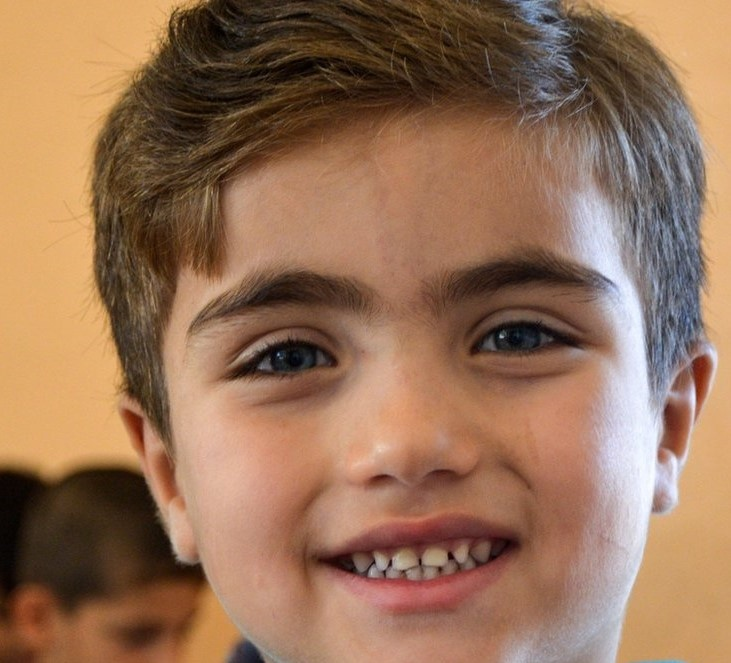

Processed and saved: /Users/isurudissanayake/Documents/Data/Processed/_108749337_gettyimages-859203314.jpg
laplacian_var:  350.12989989940934


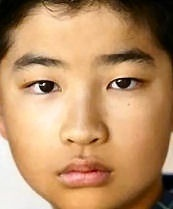

Processed and saved: /Users/isurudissanayake/Documents/Data/Processed/0001.jpg


In [8]:
## identify unclear images and remove them 2222

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import Image, display

# Load the Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to check the clarity of an image
def is_image_clear(image):
    # You can implement your own logic to check the clarity of the image.
    # For simplicity, we will use a basic approach by calculating the variance of Laplacian.
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    print("laplacian_var: ", laplacian_var)
    return laplacian_var

# Directory containing your images
input_dir = '/Users/isurudissanayake/Documents/Data/Test'
# input_dir = '/Users/isurudissanayake/Documents/Data/Resize'

# Directory to save the processed images
output_dir = '/Users/isurudissanayake/Documents/Data/Processed'
os.makedirs(output_dir, exist_ok=True)

# Loop through each image in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        # Read the image
        img_path = os.path.join(input_dir, filename)
        img = cv2.imread(img_path)
    
        # resized_img = cv2.resize(img, target_size)
        
        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces in the image
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.01, minNeighbors=3)

        # Check if a face is detected and the image is clear
        if len(faces) > 0 and is_image_clear(img):
            # Save the processed image to the output directory
            output_path = os.path.join(output_dir, filename)
            cv2.imwrite(output_path, img)
            display(Image(filename=output_path, width=20, height=20))
            print(f"Processed and saved: {output_path}")

# You can now use the images in the output directory for further processing.


In [4]:
#crop image adding margin 3333

import os
import cv2
import dlib

# Load the pre-trained face detector from dlib
detector = dlib.get_frontal_face_detector()

def crop_faces(input_folder, output_folder, margin=3):
    # Iterate through each file in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):  # Assuming images are in JPEG or PNG format
            # Construct the full paths for input and output images
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)
            print("filename: ", filename)
            # Read the image
            img = cv2.imread(input_path)

            # Convert the image to grayscale for face detection
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Detect faces in the image
            faces = detector(gray)

            if len(faces) > 0:
                # Use the first detected face (you can modify this logic based on your requirements)
                face = faces[0]

                # Extract the face region with an additional margin
                x, y, w, h = face.left(), face.top(), face.width(), face.height()
                x = max(0, x - margin)
                y = max(0, y - margin)
                w = min(img.shape[1] - x, w + 2 * margin)
                h = min(img.shape[0] - y, h + 2 * margin)

                # Extract the face region with margin
                face_region = img[y:y+h, x:x+w]

                # Check if the face region is not empty before saving
                if not face_region.size == 0:
                    # Save the cropped face to the output path
                    # display(Image(filename=output_path, width=20, height=20))
                    print("test")
                    cv2.imwrite(output_path, face_region)
                else:
                    print(f"Empty face region in {filename}.")
            else:
                print(f"No face detected in {filename}.")

# Example usage
input_folder_path = '/Users/isurudissanayake/Documents/Data/Clear'
output_folder_path = '/Users/isurudissanayake/Documents/Data/Crop'

crop_faces(input_folder_path, output_folder_path)


filename:  3c6c29274d8d2255ad86fb39a233809b.jpg
test
filename:  4_0_0_20170110213526716.jpg.chip.jpg
test
filename:  4_0_0_20170109191458548.jpg.chip.jpg
test
filename:  4_0_0_20170110211454141.jpg.chip.jpg
test
filename:  4_0_0_20170110213547600.jpg.chip.jpg
test
filename:  01.jpg
test
filename:  03.jpg
test
filename:  0002 (2).jpg
test
filename:  +â+ä-+à+º-+è+«+¦-+º+ä+¬+é+»+è+à-+ä+à+»+º+¦+¦-+¦+è+º+¦-+º+ä+º+++ü+º+ä-2018-+ü+è-+à+¦+¦.jpg
test
filename:  02.jpg
test
filename:  1d630fc582c0ef40b9b2275b7539cda5.jpg
test
filename:  4_0_0_20170110213408453.jpg.chip.jpg
test
filename:  0001.jpg
test
filename:  0003.jpg
test
filename:  2f037ec04d9ebd51486a347ac8fe8aa3.jpg
test
filename:  0002.jpg
test
filename:  4_0_0_20170110205349508.jpg.chip.jpg
test
filename:  4_0_0_20161219204117636.jpg.chip.jpg
test
filename:  4_0_0_20170104010859393.jpg.chip.jpg
test
filename:  4_0_0_20170110213325187.jpg.chip.jpg
test
filename:  4_0_0_20170110213536030.jpg.chip.jpg
test
filename:  4_0_